# Limpeza e Tratamento de Dados

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
dados = '../data/raw/airbnb-rio.csv'

In [80]:
df = pd.read_csv(dados, sep=',', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2302715,guilherme,11706874,Guilherme,NaN,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,NaN,1,365,0,NaN
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,NaN,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,NaN,1,365,0,NaN
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,NaN,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.21,1,257,3,NaN
3,2306767,Studio in Copacabana Beach,11386725,Carolina,NaN,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.44,6,66,19,NaN
4,2308385,Copacabana Ótima opção!,11788583,Ivan,NaN,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.21,1,242,4,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42013 non-null  int64  
 1   name                            42013 non-null  object 
 2   host_id                         42013 non-null  int64  
 3   host_name                       42008 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   42013 non-null  object 
 6   latitude                        42013 non-null  float64
 7   longitude                       42013 non-null  float64
 8   room_type                       42013 non-null  object 
 9   price                           38356 non-null  float64
 10  minimum_nights                  42013 non-null  int64  
 11  number_of_reviews               42013 non-null  int64  
 12  last_review                     

In [82]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               42013
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3657
minimum_nights                        0
number_of_reviews                     0
last_review                        8873
reviews_per_month                  8873
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42013
dtype: int64

<Axes: >

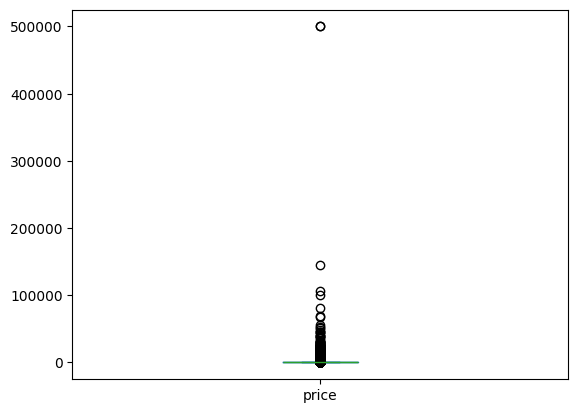

In [83]:
df['price'].plot(kind='box')

In [84]:
df['price'].describe()

count     38356.000000
mean        720.284832
std        4165.194984
min          30.000000
25%         220.000000
50%         343.000000
75%         600.000000
max      500000.000000
Name: price, dtype: float64

In [85]:
df['price'] = df['price'].fillna(df['price'].median())

In [86]:
df['price'].describe()

count     42013.000000
mean        687.444267
std        3981.206307
min          30.000000
25%         229.000000
50%         343.000000
75%         566.000000
max      500000.000000
Name: price, dtype: float64

In [87]:
df['reviews_per_month'].describe()

count    33140.000000
mean         1.263767
std          1.277616
min          0.010000
25%          0.320000
50%          0.930000
75%          1.860000
max         13.650000
Name: reviews_per_month, dtype: float64

In [88]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [89]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               42013
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8873
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42013
dtype: int64

In [90]:
df = df.drop(columns=['neighbourhood_group','license'])
df['host_name'] = df['host_name'].fillna('Nao Informado')

In [91]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8873
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [92]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2302715,guilherme,11706874,Guilherme,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,1.263767,1,365,0
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,1.263767,1,365,0
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.210000,1,257,3
3,2306767,Studio in Copacabana Beach,11386725,Carolina,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.440000,6,66,19
4,2308385,Copacabana Ótima opção!,11788583,Ivan,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.210000,1,242,4


In [93]:
contagem_quartos = df['room_type'].value_counts()
contagem_quartos

room_type
Entire home/apt    33581
Private room        8004
Shared room          404
Hotel room            24
Name: count, dtype: int64

Text(0, 0.5, 'Quantidade de imóveis')

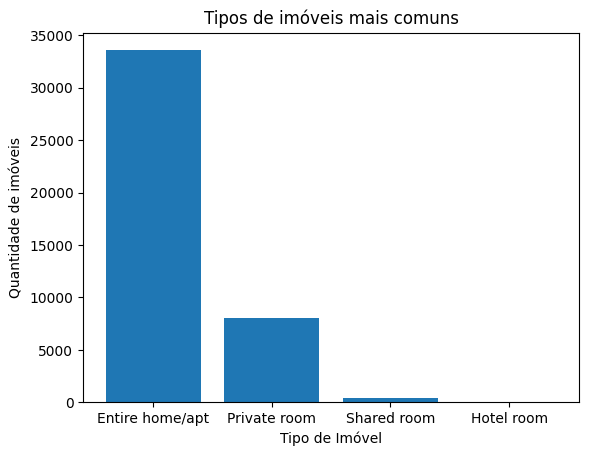

In [94]:
plt.bar(contagem_quartos.index, contagem_quartos.values)
plt.title('Tipos de imóveis mais comuns')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Quantidade de imóveis')

<BarContainer object of 10 artists>

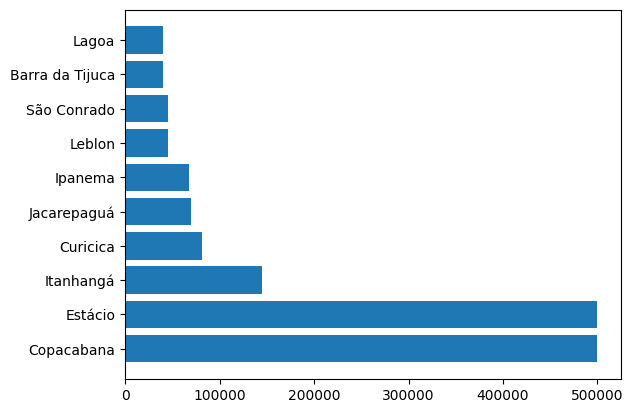

In [95]:
MaiorPreco = df.sort_values(by='price', ascending=False).drop_duplicates(subset=['neighbourhood']).head(10)
plt.barh(y=MaiorPreco['neighbourhood'], width=MaiorPreco['price'])

In [96]:
MaiorPreco

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15292,695828287387937123,Pede Desconto Copacabana Top Piso em Mármore,238544772,Cesar,Copacabana,-22.974730,-43.188900,Entire home/apt,500000.0,1,0,NaN,1.263767,22,365,0
7247,30033272,Apartamento em Rio de Janeiro,122258300,Ricardo,Estácio,-22.913490,-43.206220,Entire home/apt,500000.0,2,1,2023-02-26,0.040000,1,364,0
22982,1020594041193205143,Quarto em Apartamento vila do chaves,545665571,Ryan Rafael,Itanhangá,-22.996274,-43.313857,Private room,144799.0,1,0,NaN,1.263767,1,269,0
2568,8596751,Tudo Super Bacana pra Voltar Sempre,38555079,Eduardo,Curicica,-22.962670,-43.402340,Private room,81239.0,2,0,NaN,1.263767,1,365,0
31666,1238094016033522105,Loft AO LADO do Rio Centro/Projac/Arena Farmasi,499830307,Karem,Jacarepaguá,-22.963984,-43.406669,Entire home/apt,69300.0,1,13,2025-01-12,2.070000,2,365,13
30276,1210043754591209501,Apartment in Ipanema,195022014,Mariana,Ipanema,-22.981086,-43.198388,Entire home/apt,68000.0,1,9,2025-02-23,1.220000,1,60,9
3798,13079275,Apartamento Luxo,72535853,Angela,Leblon,-22.987650,-43.225080,Entire home/apt,45313.0,10,0,NaN,1.263767,1,358,0
39542,1354351426206385348,Charmoso prédio com vista mar em São Conrado,655960368,Priscila,São Conrado,-22.995052,-43.275854,Entire home/apt,45000.0,5,0,NaN,1.263767,7,363,0
4214,13616276,EXUBERANTE MANSAO,38928542,Leonardo,Barra da Tijuca,-22.988540,-43.381010,Entire home/apt,39648.0,10,0,NaN,1.263767,1,364,0
26,2324694,Flat NO EXTRA taxes.,11873822,Marcello,Lagoa,-22.979530,-43.203490,Entire home/apt,39600.0,5,3,2018-02-14,0.020000,1,364,0


<BarContainer object of 10 artists>

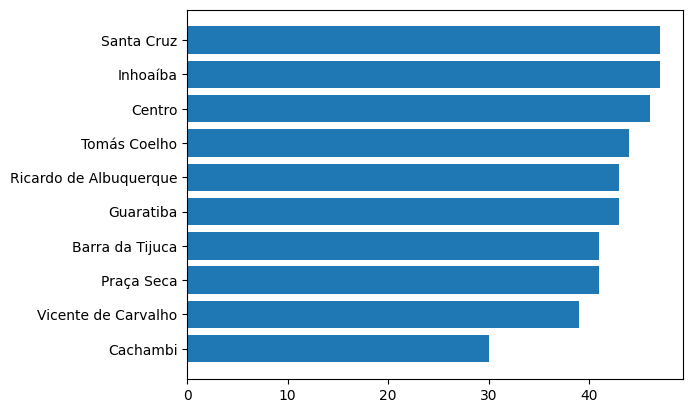

In [97]:
MenorPreco = df.sort_values(by='price', ascending=True).drop_duplicates(subset=['neighbourhood']).head(10)
plt.barh(y=MenorPreco['neighbourhood'], width=MenorPreco['price'])

In [98]:
MenorPreco

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4895,14358570,Quarto próximo ao Estádio Olímpico,87681423,Rafael,Cachambi,-22.894720,-43.269440,Private room,30.0,80,1,2017-09-25,0.010000,1,358,0
6163,21825145,Quarto da vó Vina na Vila da Penha,158569627,Etelvina,Vicente de Carvalho,-22.851200,-43.310950,Private room,39.0,120,0,NaN,1.263767,1,365,0
10164,44694409,Simples e amigável,361930995,Rogério,Praça Seca,-22.902790,-43.345170,Private room,41.0,1,1,2021-12-11,0.030000,1,179,0
9467,41126161,Suíte economica basica para carnaval,10467486,Carolina,Barra da Tijuca,-23.004050,-43.309150,Private room,41.0,4,0,NaN,1.263767,11,355,0
26679,1087896693400771259,Casa 2 quartos para Carnaval 15 min do Recreio,10467486,Carolina,Guaratiba,-22.993254,-43.558038,Entire home/apt,43.0,20,0,NaN,1.263767,11,226,0
10093,44150896,Apartamento 2 minutos de comércios e transportes,330224882,Josue,Ricardo de Albuquerque,-22.839690,-43.395120,Entire home/apt,43.0,3,0,NaN,1.263767,3,365,0
40620,1361735850376459976,Quarto em condomínio fechado,656989156,Marluce,Tomás Coelho,-22.871360,-43.304830,Private room,44.0,1,3,2025-03-10,3.000000,1,355,3
42000,1379631360574897467,Hostel Praça Tiradentes,489468090,Leni,Centro,-22.906411,-43.181780,Shared room,46.0,1,0,NaN,1.263767,10,176,0
3663,12171733,Excelente Quarto no melhor lugar de CG,52445894,Cristiano,Inhoaíba,-22.911770,-43.584430,Private room,47.0,1,0,NaN,1.263767,1,363,0
8922,39711027,Quarto amplo mobiliado,132370752,Catislene,Santa Cruz,-22.882890,-43.661710,Private room,47.0,1,0,NaN,1.263767,1,365,0
